In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from statsmodels.formula.api import ols

In [5]:
dat = pd.read_csv('movie_metadata.csv')
dat.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Data Exploration

In [6]:
dat.shape

(5043, 28)

In [7]:
dat.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [8]:
# duration: Duration in minutes
#director_name:	Name of the Director of the Movie
#director_facebook_likes:	Number of likes of the Director on his Facebook Page
#actor_1_name： Primary actor starring in the movie
#actor_1_facebook_likes： Number of likes of the Actor_1 on his/her Facebook Page
#actor_2_name： Other actor starring in the movie
#actor_2_facebook_likes： Number of likes of the Actor_2 on his/her Facebook Page
#actor_3_name： Other actor starring in the movie
#actor_3_facebook_likes	： Number of likes of the Actor_3 on his/her Facebook Page
#num_user_for_reviews： Number of users who gave a review
#num_critic_for_reviews	： Number of critical reviews on imdb
#num_voted_users： Number of people who voted for the movie
#cast_total_facebook_likes： Total number of facebook likes of the entire cast of the movie
#movie_facebook_likes： Number of Facebook likes in the movie page
#plot_keywords： Keywords describing the movie plot
#facenumber_in_poster： Number of the actor who featured in the movie poster
#color： Film colorization. ‘Black and White’ or ‘Color’
#genres： Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’
#title_year： The year in which the movie is released (1916:2016)
#language： English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc
#country： Country where the movie is produced
#content_rating：	Content rating of the movie
#aspect_ratio： Aspect ratio the movie was made in
#movie_imdb_link： IMDB link of the movie
#gross： Gross earnings of the movie in Dollars
#budget	： Budget of the movie in Dollars
#imdb_score	： IMDB Score of the movie on IMDB

In [9]:
dat.drop_duplicates(inplace = True)
dat.shape

(4998, 28)

In [10]:
language = dat['language'].unique()
language

array(['English', nan, 'Japanese', 'French', 'Mandarin', 'Aboriginal',
       'Spanish', 'Filipino', 'Hindi', 'Russian', 'Maya', 'Kazakh',
       'Telugu', 'Cantonese', 'Icelandic', 'German', 'Aramaic', 'Italian',
       'Dutch', 'Dari', 'Hebrew', 'Chinese', 'Mongolian', 'Swedish',
       'Korean', 'Thai', 'Polish', 'Bosnian', 'Hungarian', 'Portuguese',
       'Danish', 'Arabic', 'Norwegian', 'Czech', 'Kannada', 'Zulu',
       'Panjabi', 'Tamil', 'Dzongkha', 'Vietnamese', 'Indonesian', 'Urdu',
       'Romanian', 'Persian', 'Slovenian', 'Greek', 'Swahili'],
      dtype=object)

In [11]:
language = dat['language'].unique()
country = dat['country'].unique()
content_rating = dat['content_rating'].unique()
print(language)
print(country)
print(content_rating)

['English' nan 'Japanese' 'French' 'Mandarin' 'Aboriginal' 'Spanish'
 'Filipino' 'Hindi' 'Russian' 'Maya' 'Kazakh' 'Telugu' 'Cantonese'
 'Icelandic' 'German' 'Aramaic' 'Italian' 'Dutch' 'Dari' 'Hebrew'
 'Chinese' 'Mongolian' 'Swedish' 'Korean' 'Thai' 'Polish' 'Bosnian'
 'Hungarian' 'Portuguese' 'Danish' 'Arabic' 'Norwegian' 'Czech' 'Kannada'
 'Zulu' 'Panjabi' 'Tamil' 'Dzongkha' 'Vietnamese' 'Indonesian' 'Urdu'
 'Romanian' 'Persian' 'Slovenian' 'Greek' 'Swahili']
['USA' 'UK' nan 'New Zealand' 'Canada' 'Australia' 'Belgium' 'Japan'
 'Germany' 'China' 'France' 'New Line' 'Mexico' 'Spain' 'Hong Kong'
 'Czech Republic' 'India' 'Soviet Union' 'South Korea' 'Peru' 'Italy'
 'Russia' 'Aruba' 'Denmark' 'Libya' 'Ireland' 'South Africa' 'Iceland'
 'Switzerland' 'Romania' 'West Germany' 'Chile' 'Netherlands' 'Hungary'
 'Panama' 'Greece' 'Sweden' 'Norway' 'Taiwan' 'Official site' 'Cambodia'
 'Thailand' 'Slovakia' 'Bulgaria' 'Iran' 'Poland' 'Georgia' 'Turkey'
 'Nigeria' 'Brazil' 'Finland' 'Bahamas' '

In [12]:
content_rating = dat['content_rating'].unique()
content_rating

array(['PG-13', nan, 'PG', 'G', 'R', 'TV-14', 'TV-PG', 'TV-MA', 'TV-G',
       'Not Rated', 'Unrated', 'Approved', 'TV-Y', 'NC-17', 'X', 'TV-Y7',
       'GP', 'Passed', 'M'], dtype=object)

In [13]:
new_order = ['movie_title','color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes']
dat = dat.reindex(columns = new_order)
dat.head()

,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [14]:
## print categorical and numerical variables
categorical_columns = dat.select_dtypes(include=['object']).columns
numerical_columns = dat.select_dtypes(include=['int64', 'float64']).columns
categorical_columns , numerical_columns

(Index(['movie_title', 'color', 'director_name', 'actor_2_name', 'genres',
        'actor_1_name', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
        'language', 'country', 'content_rating'],
       dtype='object'),
 Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
        'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
        'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
        'num_user_for_reviews', 'budget', 'title_year',
        'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
        'movie_facebook_likes'],
       dtype='object'))

In [15]:
dat[numerical_columns].describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4949.000000,4983.000000,4895.000000,4975.000000,4991.000000,4.124000e+03,4.998000e+03,4998.000000,4985.000000,4977.000000,4.511000e+03,4891.000000,4985.000000,4998.000000,4671.000000,4998.000000
mean,139.890079,107.213325,688.679060,639.900905,6556.939892,4.832565e+07,8.347020e+04,9676.941176,1.368907,272.014667,3.974787e+07,2002.468820,1642.998796,6.441056,2.221417,7487.430172
std,121.477586,25.248775,2821.649616,1643.298282,15061.586700,6.796483e+07,1.380866e+05,18165.404578,2.014623,377.776210,2.069689e+08,12.475235,4030.925303,1.124107,1.391185,19290.726563
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,611.500000,5.304835e+06,8.560000e+03,1405.500000,0.000000,64.000000,6.000000e+06,1999.000000,280.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,369.000000,984.000000,2.544575e+07,3.426050e+04,3085.500000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,162.500000
75%,195.000000,118.000000,192.000000,635.000000,11000.000000,6.231942e+07,9.612075e+04,13740.500000,2.000000,324.000000,4.500000e+07,2011.000000,917.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [16]:
dat.groupby("director_name")["gross"].mean().sort_values(ascending=False).head(10)

director_name
Lee Unkrich        4.149845e+08
Chris Buck         4.007366e+08
Joss Whedon        3.692024e+08
Tim Miller         3.630243e+08
George Lucas       3.482837e+08
Kyle Balda         3.360296e+08
Colin Trevorrow    3.280925e+08
Yarrow Cheney      3.235055e+08
Pete Docter        3.131138e+08
Pierre Coffin      3.097756e+08
Name: gross, dtype: float64

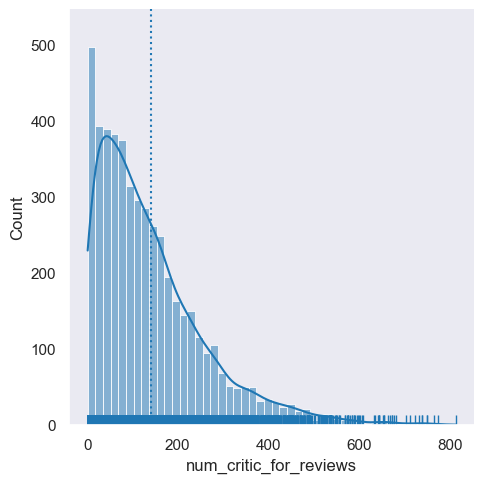

In [17]:
### ploting the distribution of variables 
sns.set_context('notebook')
sns.set_style('dark')
fig1 = sns.displot(data = dat, 
                x = 'num_critic_for_reviews',
                kind = 'hist', 
                rug = True, 
                kde = True)
plt.axvline(dat['num_critic_for_reviews'].mean(), linestyle = "dotted")
plt.show()

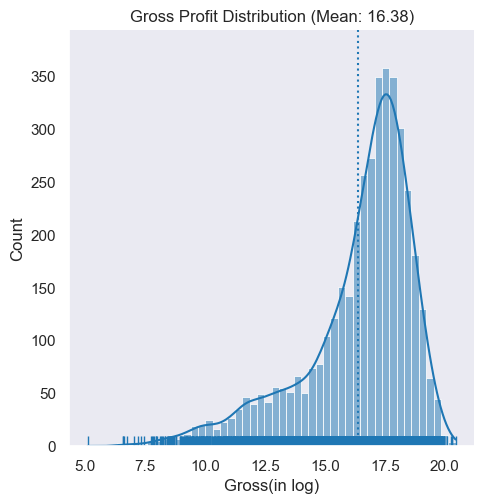

In [18]:
### log gross and buget 
dat['logbudget'] = np.log(dat['budget'] + 1)
dat['loggross'] = np.log(dat['gross'] + 1)

#dat["gross_millions"] = dat["gross"] / 1e6
#print(dat["gross_millions"].describe())

fig2 = sns.displot(
    data=dat,x= 'loggross',
    kind="hist",
    rug=True,
    kde=True)

plt.axvline(dat['loggross'].mean(), linestyle="dotted")
plt.title(f"Gross Profit Distribution (Mean: {dat['loggross'].mean():.2f})")
plt.xlabel("Gross(in log)")
plt.show()

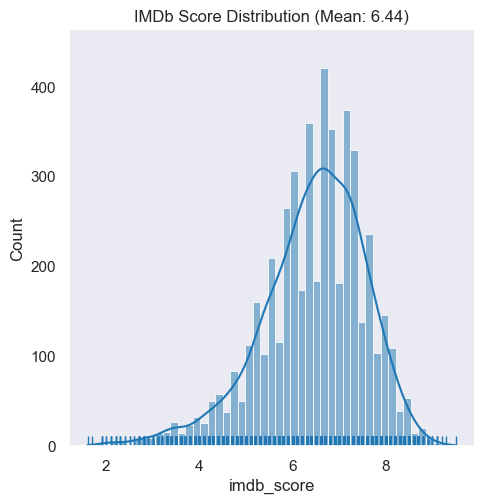

In [19]:
sns.set_context('notebook')
sns.set_style('dark')
fig3 = sns.displot(data = dat, 
                x = 'imdb_score', 
                kind = 'hist', 
                rug = True, 
                kde = True)
plt.title(f"IMDb Score Distribution (Mean: {dat['imdb_score'].mean():.2f})")
plt.show()

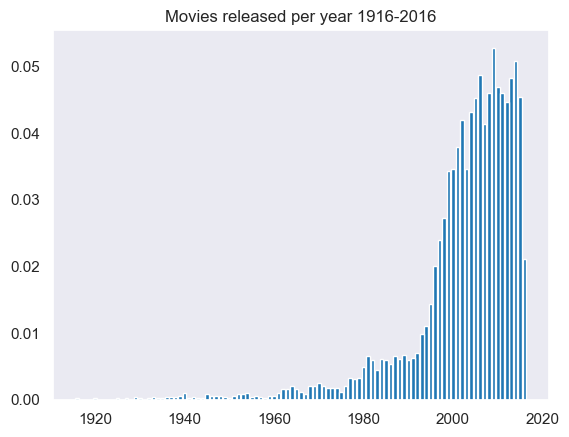

<Figure size 1800x800 with 0 Axes>

In [20]:
### what year are the movies made
fig, ax = plt.subplots()
year = dat['title_year'].value_counts(normalize = True)
ax.bar(year.index, year)
plt.title('Movies released per year 1916-2016')
plt.figure(figsize=(18,8))
plt.show()

<Axes: xlabel='logbudget', ylabel='loggross'>

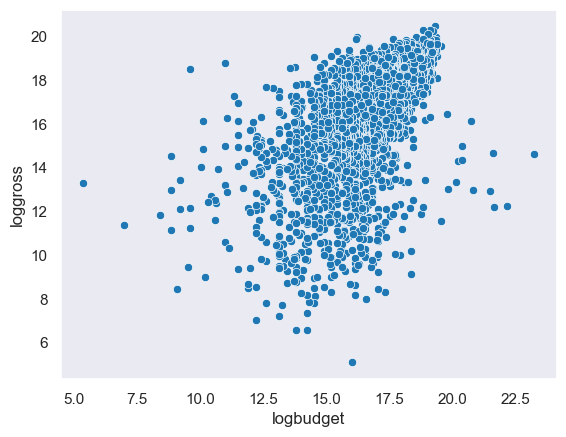

In [21]:
## mapping the relationship between budget and gross profit
sns.scatterplot(data=dat, x=dat['logbudget'], y= dat['loggross'])

# Data cleaning

In [22]:
### missing values
dat.isnull().sum()

movie_title                    0
color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
logbudget                    487
loggross                     874
dtype: int

In [23]:
dat_clean = dat.dropna()

In [24]:
dat_clean.shape

(3722, 30)

In [25]:
language = dat_clean['language'].unique()
language

array(['English', 'Mandarin', 'Aboriginal', 'Spanish', 'French',
       'Filipino', 'Maya', 'Kazakh', 'Cantonese', 'Japanese', 'Aramaic',
       'Italian', 'Dutch', 'Dari', 'German', 'Mongolian', 'Thai',
       'Bosnian', 'Korean', 'Hungarian', 'Hindi', 'Danish', 'Portuguese',
       'Norwegian', 'Czech', 'Russian', 'Zulu', 'Hebrew', 'Arabic',
       'Vietnamese', 'Indonesian', 'Romanian', 'Persian'], dtype=object)

In [26]:
dat_clean.language.value_counts().head(15)

language
English       3566
French          34
Spanish         23
Mandarin        14
German          10
Japanese        10
Cantonese        7
Italian          7
Portuguese       5
Hindi            5
Korean           5
Norwegian        4
Danish           3
Thai             3
Persian          3
Name: count, dtype: int64

In [27]:
dat_clean.country.value_counts().head(15)

country
USA            2960
UK              313
France          101
Germany          79
Canada           59
Australia        39
Spain            21
Japan            15
Hong Kong        13
China            12
Italy            11
New Zealand      11
South Korea       8
Denmark           8
Ireland           7
Name: count, dtype: int64

In [28]:
color = dat_clean['color'].unique()
color

array(['Color', ' Black and White'], dtype=object)

In [29]:
### recoding categorical variables - color
dat_clean['is_colored'] = np.where(dat_clean['color'] == 'Color', 1, 0)

/var/folders/b9/v2kpbcgx5051l6gwgrg0zxn00000gn/T/ipykernel_21547/278157839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_clean['is_colored'] = np.where(dat_clean['color'] == 'Color', 1, 0)


In [30]:
### checking the recodes
is_colored = dat_clean['is_colored'].unique()
is_colored

array([1, 0])

In [31]:
## creating main genre variable
dat_clean['main_genre'] = dat_clean.genres.str.split('|').str[0]

/var/folders/b9/v2kpbcgx5051l6gwgrg0zxn00000gn/T/ipykernel_21547/812518492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_clean['main_genre'] = dat_clean.genres.str.split('|').str[0]


In [32]:
### creating whether english film variable
dat_clean['is_english_film'] = np.where(dat_clean['language'] == 'English', 1, 0)

/var/folders/b9/v2kpbcgx5051l6gwgrg0zxn00000gn/T/ipykernel_21547/4131830233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_clean['is_english_film'] = np.where(dat_clean['language'] == 'English', 1, 0)


In [33]:
# creating film region variable
dat_clean['region'] = 'Other'
dat_clean.loc[dat_clean['country'].isin(['USA', 'Canada']), 'region'] = 'North_America'
dat_clean.loc[dat_clean['country'].isin(['UK']), 'region'] = 'UK'
dat_clean.loc[dat_clean['country'].isin(['France', 'Germany','Italy','Denmark','Ireland']), 'region'] = 'Europe'
dat_clean.loc[dat_clean['country'].isin(['Japan','Hong Kong','China','South Korea']), 'region'] = 'East_Asia'

/var/folders/b9/v2kpbcgx5051l6gwgrg0zxn00000gn/T/ipykernel_21547/2295501042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_clean['region'] = 'Other'


In [34]:
dat_clean = dat_clean.drop(columns=['plot_keywords', 'movie_imdb_link'])

In [35]:
### creating dummy for main genres
genre = dat_clean['main_genre'].unique()
genre
dummies = pd.get_dummies(dat_clean['main_genre'], prefix = 'genre', drop_first = False)
dat_clean = pd.concat([dat_clean, dummies], axis=1)
print(dummies)

      genre_Action  genre_Adventure  genre_Animation  genre_Biography  \
0             True            False            False            False   
1             True            False            False            False   
2             True            False            False            False   
3             True            False            False            False   
5             True            False            False            False   
...            ...              ...              ...              ...   
5026         False            False            False            False   
5027         False            False            False            False   
5033         False            False            False            False   
5035          True            False            False            False   
5042         False            False            False            False   

      genre_Comedy  genre_Crime  genre_Documentary  genre_Drama  genre_Family  \
0            False        False           

In [36]:
### ### creating dummy for regions
dummies = pd.get_dummies(dat_clean['region'], prefix = 'region', drop_first = True)
dat_clean = pd.concat([dat_clean, dummies], axis=1)

In [37]:
### creating a binary variable for whether gross >= budget
dat_clean['budget_profit'] = dat_clean['gross']/ dat_clean['budget']

In [38]:
### creating a binary variable for whether gross >= budget 
dat_clean['profited'] = np.where(dat_clean['budget_profit'] > 1, 1, 0)
dat_clean[['logbudget','loggross','budget_profit','profited']].head(10)

,logbudget,loggross,budget_profit,profited
0,19.283571,20.449494,3.208885,1
1,19.519293,19.550159,1.031347,1
2,19.316769,19.114199,0.816629,0
3,19.336971,19.920595,1.792523,1
5,19.390323,18.106774,0.277052,0
6,19.368470,19.634199,1.304381,1
7,19.376192,19.117856,0.772336,0
8,19.336971,19.944542,1.835966,1
9,19.336971,19.525795,1.207828,1
10,19.336971,19.615358,1.320996,1


In [39]:
### creat the director movie count variable
dat_clean['director_count'] = dat_clean["director_name"].map(dat_clean["director_name"].value_counts())
dat_clean['director_count'].describe()

count    3722.000000
mean        4.543256
std         4.175392
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        25.000000
Name: director_count, dtype: float64

In [40]:
### calculating movie mean score for directors and append to dataset
director_mean = dat_clean.groupby("director_name")["imdb_score"].mean()
dat_clean['director_meanimdb'] = dat_clean["director_name"].map(director_mean)

In [41]:
#check
dat_clean[['director_name', 'imdb_score', 'director_count','director_meanimdb']].head(10)

,director_name,imdb_score,director_count,director_meanimdb
0,James Cameron,7.9,7,7.914286
1,Gore Verbinski,7.1,7,6.985714
2,Sam Mendes,6.8,8,7.500000
3,Christopher Nolan,8.5,8,8.425000
5,Andrew Stanton,6.6,3,7.733333
6,Sam Raimi,6.2,12,6.850000
7,Nathan Greno,7.8,1,7.800000
8,Joss Whedon,7.5,3,7.866667
9,David Yates,7.5,3,7.200000
10,Zack Snyder,6.9,8,7.175000


In [42]:
print(dat_clean.columns)

Index(['movie_title', 'color', 'director_name', 'num_critic_for_reviews',
       'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres',
       'actor_1_name', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'num_user_for_reviews',
       'language', 'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'logbudget', 'loggross', 'is_colored',
       'main_genre', 'is_english_film', 'region', 'genre_Action',
       'genre_Adventure', 'genre_Animation', 'genre_Biography', 'genre_Comedy',
       'genre_Crime', 'genre_Documentary', 'genre_Drama', 'genre_Family',
       'genre_Fantasy', 'genre_Horror', 'genre_Musical', 'genre_Mystery',
       'genre_Romance', 'genre_Sci-Fi', 'genre_Thriller', 'genre_Western',
       'region_Europe', 'region_North_America', 'region_Other', 'regio

In [43]:
### check after data cleaning
dat_clean.head()

,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,genre_Thriller,genre_Western,region_Europe,region_North_America,region_Other,region_UK,budget_profit,profited,director_count,director_meanimdb
0,Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,False,False,False,True,False,False,3.208885,1,7,7.914286
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,False,False,False,True,False,False,1.031347,1,7,6.985714
2,Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,False,False,False,False,False,True,0.816629,0,8,7.500000
3,The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,False,False,False,True,False,False,1.792523,1,8,8.425000
5,John Carter,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,...,False,False,False,True,False,False,0.277052,0,3,7.733333


# Regression model for predicting imdb score

In [44]:
# Scikit-Learn
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import get_scorer_names
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_text
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model  import LassoCV
from sklearn.linear_model import RidgeCV

In [45]:
lnmodel1 = ols('imdb_score ~ loggross + director_count + director_facebook_likes + cast_total_facebook_likes + main_genre + is_colored ', data = dat_clean).fit()
lnmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     35.87
Date:                Thu, 25 Sep 2025   Prob (F-statistic):          5.94e-132
Time:                        12:40:07   Log-Likelihood:                -5129.0
No. Observations:                3722   AIC:                         1.030e+04
Df Residuals:                    3700   BIC:                         1.044e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     5.8198      0.164     35.511      0.000       5.499       6.141
main_genre[T.Adventure]       0.2863      0.059      4.824      0.000       0.170       0.403
main_genre[T.Animation]       0.4992      0.147      3.391      0.001       0.211       0.788
main_genre[T.Biography]       0.8559      0.075     11.394      0.000       0.709       1.003
main_genre[T.Comedy]         -0.0327      0.044     -0.736      0.462      -0.120       0.054
main_genre[T.Crime]           0.6800      0.069      9.851      0.000       0.545       0.815
main_genre[T.Documentary]     0.6836      0.196      3.485      0.000       0.299       1.068
main_genre[T.Drama]           0.6268      0.050     12.558      0.000       0.529       0.725
main_genre[T.Family]          0.0409      0.557      0.073      0.942      -1.052       1.134
main_genre[T.Fantasy]         0.0672      0.161      0.416      0.677      -0.249       0.384
main_genre[T.Horror]         -0.3454      0.083     -4.166      0.000      -0.508      -0.183
main_genre[T.Musical]         0.3687      0.683      0.540      0.589      -0.970       1.708
main_genre[T.Mystery]         0.2776      0.203      1.364      0.173      -0.121       0.677
main_genre[T.Romance]         0.9326      0.963      0.968      0.333      -0.956       2.822
main_genre[T.Sci-Fi]          0.5065      0.366      1.385      0.166      -0.210       1.223
main_genre[T.Thriller]       -0.8522      0.966     -0.882      0.378      -2.747       1.042
main_genre[T.Western]         1.4627      0.683      2.143      0.032       0.124       2.801
loggross                      0.0468      0.008      5.555      0.000       0.030       0.063
director_count                0.0286      0.005      6.270      0.000       0.020       0.038
director_facebook_likes    3.045e-05   5.93e-06      5.132      0.000    1.88e-05    4.21e-05
cast_total_facebook_likes  3.089e-06   8.49e-07      3.640      0.000    1.43e-06    4.75e-06
is_colored                   -0.5683      0.089     -6.369      0.000      -0.743      -0.393
==============================================================================
Omnibus:                      401.362   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              677.545
Skew:                          -0.749   Prob(JB):                    7.46e-148
Kurtosis:                       4.458   Cond. No.                     1.37e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
## LASSO for lnmodel 
predictors = ['director_count',
              'loggross',
              'director_facebook_likes','cast_total_facebook_likes',
              'genre_Drama','genre_Adventure','genre_Biography',
              'num_critic_for_reviews',
              'is_english_film',
             'is_colored']

y = dat_clean['imdb_score']
X = dat_clean.reset_index()[predictors]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(list(X_scaled[0])) 
X.head()

[np.float64(0.5884654143907907), np.float64(1.8216651792673275), np.float64(-0.26327423252343346), np.float64(-0.3486772235697709), np.float64(-0.46384107965549065), np.float64(-0.3302399171217015), np.float64(-0.24080592370971607), np.float64(4.507342416980115), np.float64(0.2091566271288127), np.float64(0.18486795299471662)]


,director_count,loggross,director_facebook_likes,cast_total_facebook_likes,genre_Drama,genre_Adventure,genre_Biography,num_critic_for_reviews,is_english_film,is_colored
0,7,20.449494,0.0,4834,False,False,False,723.0,1,1
1,7,19.550159,563.0,48350,False,False,False,302.0,1,1
2,8,19.114199,0.0,11700,False,False,False,602.0,1,1
3,8,19.920595,22000.0,106759,False,False,False,813.0,1,1
4,3,18.106774,475.0,1873,False,False,False,462.0,1,1


In [47]:
### checking multicollinearity
dat_clean[predictors].corr()

,director_count,loggross,director_facebook_likes,cast_total_facebook_likes,genre_Drama,genre_Adventure,genre_Biography,num_critic_for_reviews,is_english_film,is_colored
director_count,1.000000,0.300765,0.487302,0.151108,-0.035743,-0.005151,0.015884,0.196996,0.108147,-0.033186
loggross,0.300765,1.000000,0.106314,0.182714,-0.141024,0.129147,-0.033962,0.371124,0.254593,0.063375
director_facebook_likes,0.487302,0.106314,1.000000,0.120057,0.006800,0.000529,0.066907,0.175703,0.024204,-0.059226
cast_total_facebook_likes,0.151108,0.182714,0.120057,1.000000,-0.013468,0.023199,0.029635,0.233730,0.105315,0.029082
genre_Drama,-0.035743,-0.141024,0.006800,-0.013468,1.000000,-0.153179,-0.111696,-0.011253,-0.103193,-0.012687
genre_Adventure,-0.005151,0.129147,0.000529,0.023199,-0.153179,1.000000,-0.079524,0.042115,0.024045,0.030765
genre_Biography,0.015884,-0.033962,0.066907,0.029635,-0.111696,-0.079524,1.000000,0.029762,0.026804,-0.080948
num_critic_for_reviews,0.196996,0.371124,0.175703,0.233730,-0.011253,0.042115,0.029762,1.000000,0.022855,0.001264
is_english_film,0.108147,0.254593,0.024204,0.105315,-0.103193,0.024045,0.026804,0.022855,1.000000,0.058838
is_colored,-0.033186,0.063375,-0.059226,0.029082,-0.012687,0.030765,-0.080948,0.001264,0.058838,1.000000


The alpha that minimizes the Lasso Cross-Validation MSE is: 0.006294988990221888


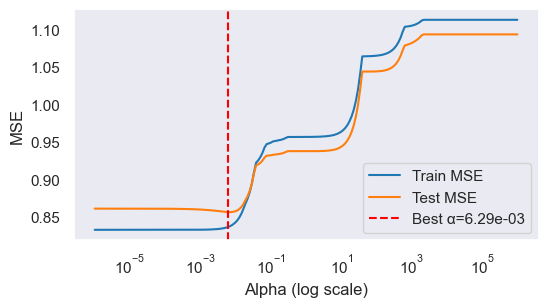

In [84]:
## adjusted alpha for lasso 
lasso = Lasso(max_iter = 20000000)
coefs = list()
errors = list()
CVerrors = list()
alphas = np.logspace(-6, 6, 200)

## CV - train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1234)

## find the best alpha
for a in alphas:
    lasso.set_params(alpha = a).fit(X_train, y_train)
    CVerrors.append(np.mean((lasso.predict(X_test) - y_test) ** 2))
    errors.append(np.mean((lasso.predict(X_train) - y_train) ** 2))

print('The alpha that minimizes the Lasso Cross-Validation MSE is: ' + str(alphas[CVerrors.index(min(CVerrors))]))
    
mses = pd.DataFrame({
    'trainMSE': errors,
    'testMSE': CVerrors}, index = alphas)

plt.figure(figsize=(6,3))
plt.semilogx(mses.index, mses['trainMSE'], label="Train MSE")
plt.semilogx(mses.index, mses['testMSE'], label="Test MSE")
plt.axvline(best_alpha, color="red", linestyle="--", label=f"Best α={best_alpha:.2e}")
plt.xlabel("Alpha (log scale)")
plt.ylabel("MSE")
plt.legend()
plt.show()

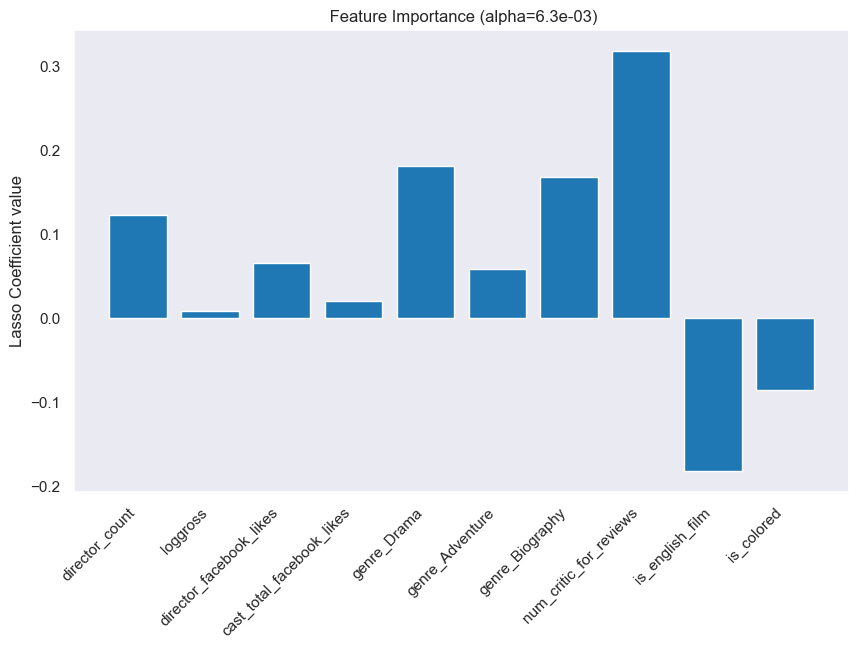

num_critic_for_reviews       0.317818
is_english_film              0.182192
genre_Drama                  0.180516
genre_Biography              0.167380
director_count               0.122072
is_colored                   0.085790
director_facebook_likes      0.065412
genre_Adventure              0.058126
cast_total_facebook_likes    0.020732
loggross                     0.008636
dtype: float64


In [79]:
### get the most influential features

best_alpha = 0.006294988990221888

lasso_best = Lasso(alpha=best_alpha, max_iter=2000000).fit(X_scaled, y)

plt.figure(figsize=(10,6))
plt.bar(X.columns, lasso_best.coef_)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Lasso Coefficient value")
plt.title(f" Feature Importance (alpha={best_alpha:.1e})")
plt.show()

importance = pd.Series(np.abs(lasso_best.coef_), index=X.columns)
print(importance.sort_values(ascending=False))

In [52]:
### using the  most influential features from LASSO to fit model
lnmodel3 = ols('imdb_score ~ num_critic_for_reviews + is_english_film + genre_Drama + genre_Biography + director_count + is_colored', data = dat_clean).fit()
lnmodel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     191.6
Date:                Thu, 04 Sep 2025   Prob (F-statistic):          3.10e-213
Time:                        15:46:11   Log-Likelihood:                -4972.2
No. Observations:                3722   AIC:                             9958.
Df Residuals:                    3715   BIC:                         1.000e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.0887      0.110     64.173      0.000       6.872       7.305
genre_Drama[T.True]         0.4678      0.040     11.687      0.000       0.389       0.546
genre_Biography[T.True]     0.7555      0.067     11.272      0.000       0.624       0.887
num_critic_for_reviews      0.0027      0.000     21.952      0.000       0.002       0.003
is_english_film            -0.9276      0.076    -12.152      0.000      -1.077      -0.778
director_count              0.0387      0.004     10.431      0.000       0.031       0.046
is_colored                 -0.5100      0.085     -6.001      0.000      -0.677      -0.343
==============================================================================
Omnibus:                      352.537   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              580.240
Skew:                          -0.684   Prob(JB):                    1.01e-126
Kurtosis:                       4.368   Cond. No.                     1.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [152]:
## CV - train test split for variable selection 

y = dat_clean['imdb_score']
X = dat_clean[['num_critic_for_reviews',
               'is_english_film',
               'genre_Drama',
               'genre_Biography',
               'director_count',
               'is_colored']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1234)

X_train.shape

(2977, 8)

In [153]:
reg1 = LinearRegression().fit(X_train,y_train)
y_pred = reg1.predict(X_test)

In [154]:
np.mean((y_pred - y_test) ** 2)

np.float64(0.3378476672691267)

In [155]:
### CV - check MSE when removing genre and colored
#y = dat_clean['imdb_score']
#X = dat_clean[['director_meanimdb','loggross',
               'director_facebook_likes','cast_total_facebook_likes','num_critic_for_reviews']]

#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1234)

#X_train.shape

(2977, 5)

In [156]:
### CV - check MSE when removing genre and colored
#reg2 = LinearRegression().fit(X_train,y_train)
#y_pred = reg2.predict(X_test)

#np.mean((y_pred - y_test) ** 2)

np.float64(0.3408374318237348)

In [158]:
### CV - check MSE when removing facebook likes
#reg3 = LinearRegression().fit(X_train,y_train)
#y_pred = reg3.predict(X_test)

#np.mean((y_pred - y_test) ** 2)

np.float64(0.3372087831576982)

## Logistic regression for break even prediction

In [125]:
y = dat_clean['profited']
X = dat_clean[['director_count',
               'director_meanimdb',
               'region_North_America',
               'director_facebook_likes',
               'cast_total_facebook_likes',
               'num_critic_for_reviews',
               'num_user_for_reviews',
               'genre_Drama',
               'is_english_film']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, 
    random_state = 1234
)

# Loading the model
logreg =  LogisticRegression(solver = 'newton-cg')

# Fitting the models
logreg.fit(X_train,y_train)
y_pred_logreg = logreg.predict(X_test)

In [126]:
print(confusion_matrix(y_test, y_pred_logreg))

[[211 213]
 [133 374]]


In [128]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.61      0.50      0.55       424
           1       0.64      0.74      0.68       507

    accuracy                           0.63       931
   macro avg       0.63      0.62      0.62       931
weighted avg       0.63      0.63      0.62       931



In [ ]:
#dat['imbd_class'] = pd.cut(dat['imdb_score'], bins=[1, 4, 7, float('Inf')], labels=['Flop Movie', 'Average Movie', 'Hit Movie'])

In [131]:
### 5-folds validation
cv = KFold(n_splits = 5, random_state = 1234, shuffle = True) 
logreg =  LogisticRegression(solver = 'newton-cg')

## Run the CV
logreg_scores = cross_val_score(logreg, X_train, y_train,
                         scoring="f1",
                         cv = cv)

print("F1 scores from 5 folds:", logreg_scores)
print("Mean F1 score:", logreg_scores.mean())

F1 scores from 5 folds: [0.659375   0.66455696 0.68699839 0.65506329 0.67823344]
Mean F1 score: 0.668845417302785


In [132]:
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.61      0.50      0.55       424
           1       0.64      0.74      0.68       507

    accuracy                           0.63       931
   macro avg       0.63      0.62      0.62       931
weighted avg       0.63      0.63      0.62       931



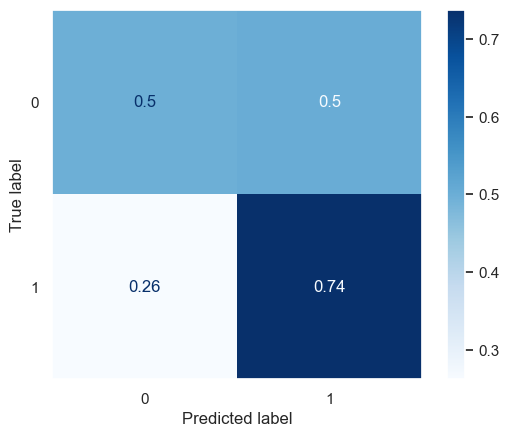

In [127]:
### confusion matrix
ConfusionMatrixDisplay.from_estimator(logreg, X_test,y_test,
        cmap = plt.cm.Blues, normalize = 'true')
plt.show()

## Decision tree model for break even prediction

In [121]:
y = dat_clean['profited']
X = dat_clean[['director_count',
               'director_meanimdb',
               'region_North_America',
               'director_facebook_likes',
               'cast_total_facebook_likes',
               'num_critic_for_reviews',
               'num_user_for_reviews',
               'genre_Drama',
               'is_english_film']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, 
    random_state = 1234
)

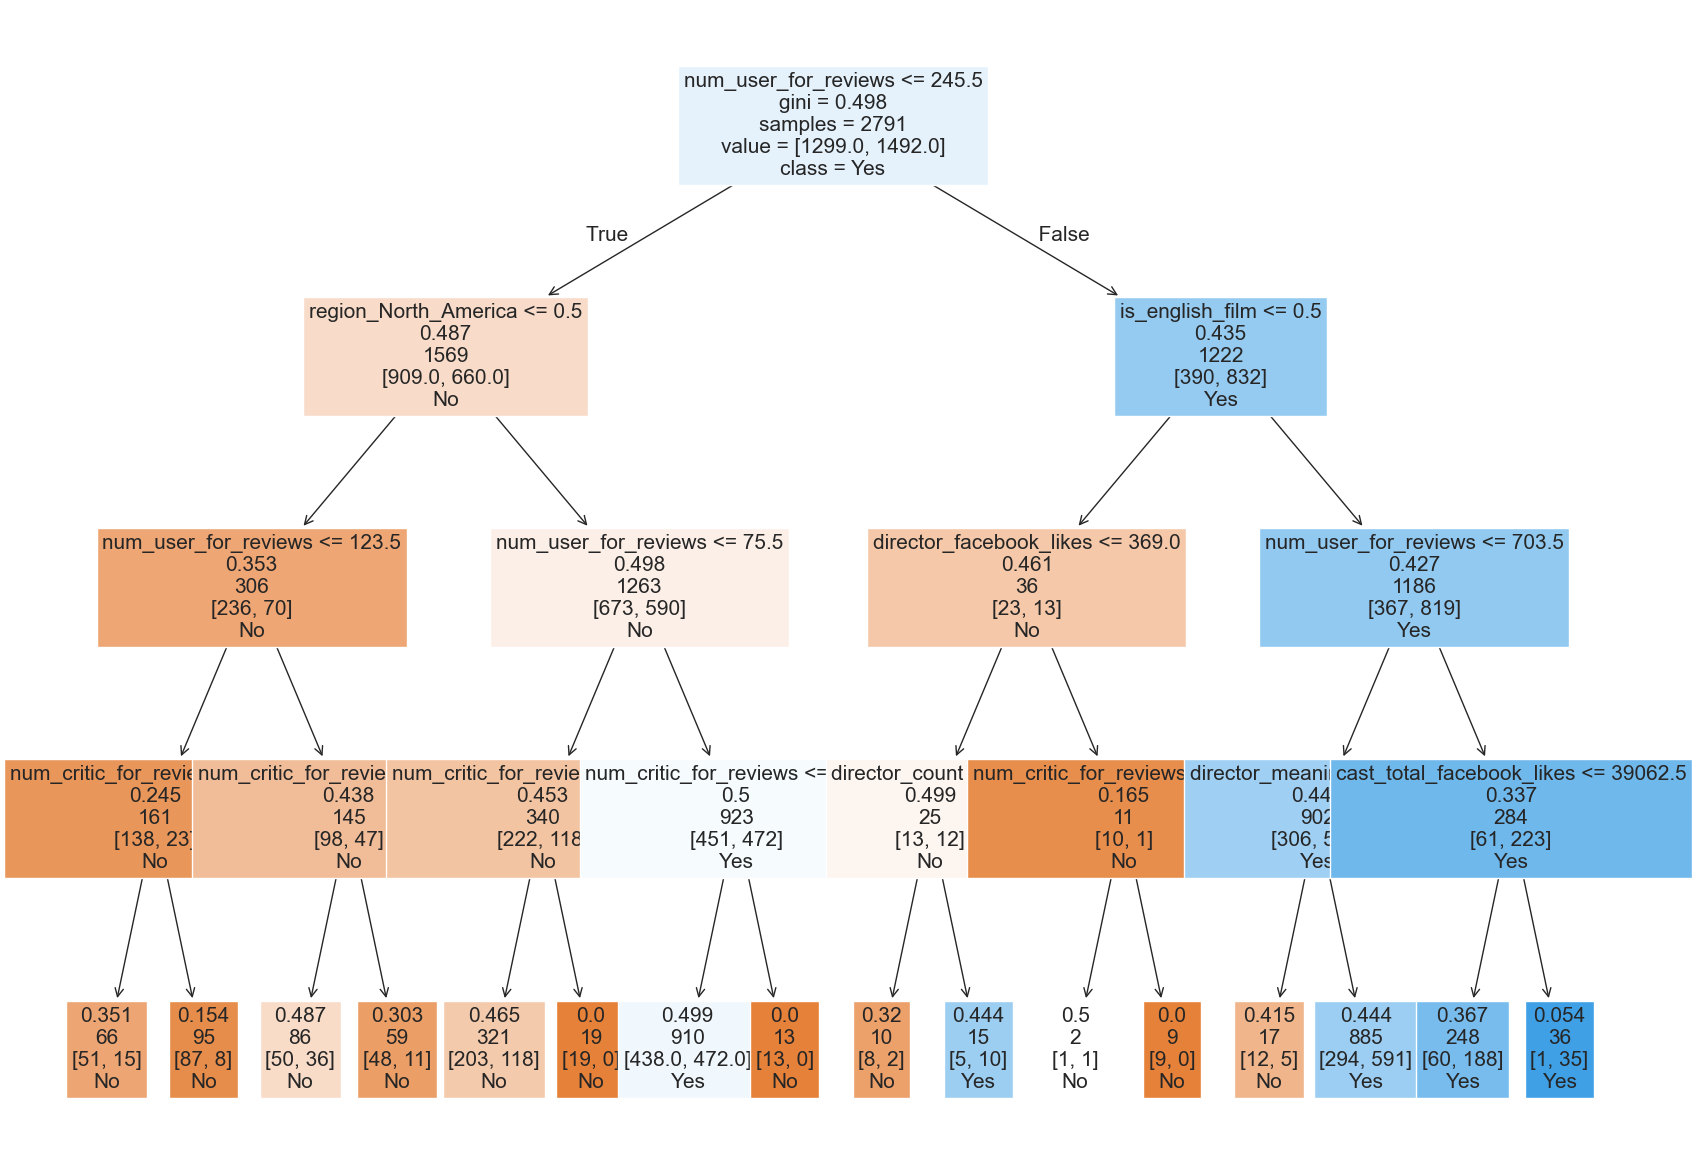

In [134]:
dt = DecisionTreeClassifier(max_depth = 4)

dt.fit(X_train, y_train)

fig = plt.figure(figsize = (20,15))
plot_tree(dt, fontsize = 15, feature_names = list(X.columns), 
          max_depth = 4, class_names = ['No', 'Yes'],
         label = 'root', filled = True)
plt.show()

In [135]:
print(export_text(dt, feature_names = list(X.columns)))

|--- num_user_for_reviews <= 245.50
|   |--- region_North_America <= 0.50
|   |   |--- num_user_for_reviews <= 123.50
|   |   |   |--- num_critic_for_reviews <= 65.50
|   |   |   |   |--- class: 0
|   |   |   |--- num_critic_for_reviews >  65.50
|   |   |   |   |--- class: 0
|   |   |--- num_user_for_reviews >  123.50
|   |   |   |--- num_critic_for_reviews <= 151.50
|   |   |   |   |--- class: 0
|   |   |   |--- num_critic_for_reviews >  151.50
|   |   |   |   |--- class: 0
|   |--- region_North_America >  0.50
|   |   |--- num_user_for_reviews <= 75.50
|   |   |   |--- num_critic_for_reviews <= 122.00
|   |   |   |   |--- class: 0
|   |   |   |--- num_critic_for_reviews >  122.00
|   |   |   |   |--- class: 0
|   |   |--- num_user_for_reviews >  75.50
|   |   |   |--- num_critic_for_reviews <= 327.50
|   |   |   |   |--- class: 1
|   |   |   |--- num_critic_for_reviews >  327.50
|   |   |   |   |--- class: 0
|--- num_user_for_reviews >  245.50
|   |--- is_english_film <= 0.50
|   |  

[[148  60]
 [276 447]]
              precision    recall  f1-score   support

           0       0.35      0.71      0.47       208
           1       0.88      0.62      0.73       723

    accuracy                           0.64       931
   macro avg       0.62      0.66      0.60       931
weighted avg       0.76      0.64      0.67       931



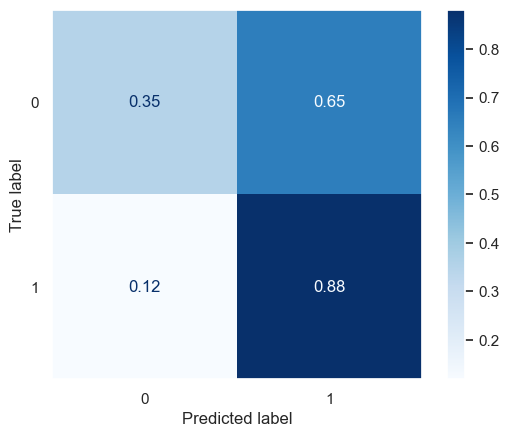

In [136]:
### confusion matrix
y_pred = dt.predict(X_test)

print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test,
        cmap = plt.cm.Blues, normalize = 'true')
plt.show()

In [48]:
### Decision tree presents better overall performance than logistic model
### Better at identifying successful movie